In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Change directory
# You will need to adjust the path as necessary
path = 'datasets'
inforce = pd.read_csv(f"{path}/inforce.csv")

           recordID  survivorShip      issueDate        matDate  \
count  190000.00000      190000.0  190000.000000  190000.000000   
mean    95000.50000           1.0   39064.100579   47096.701600   
std     54848.41991           0.0    1476.218949    2156.831904   
min         1.00000           1.0   36526.000000   42005.000000   
25%     47500.75000           1.0   37773.000000   45566.000000   
50%     95000.50000           1.0   39052.000000   47088.000000   
75%    142500.25000           1.0   40330.000000   48639.000000   
max    190000.00000           1.0   41609.000000   52201.000000   

           birthDate  currentDate       baseFee       riderFee     rollUpRate  \
count  190000.000000     190000.0  1.900000e+05  190000.000000  190000.000000   
mean    23728.279437      41791.0  2.000000e-02       0.006184       0.013158   
std      3159.130390          0.0  3.469456e-18       0.001664       0.022017   
min     18264.000000      41791.0  2.000000e-02       0.002500       0.0

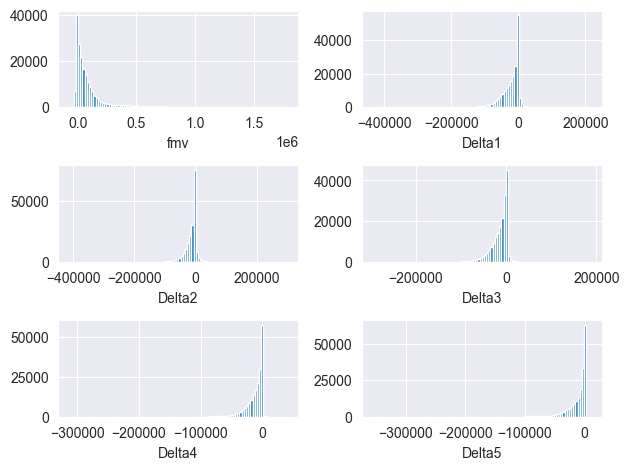

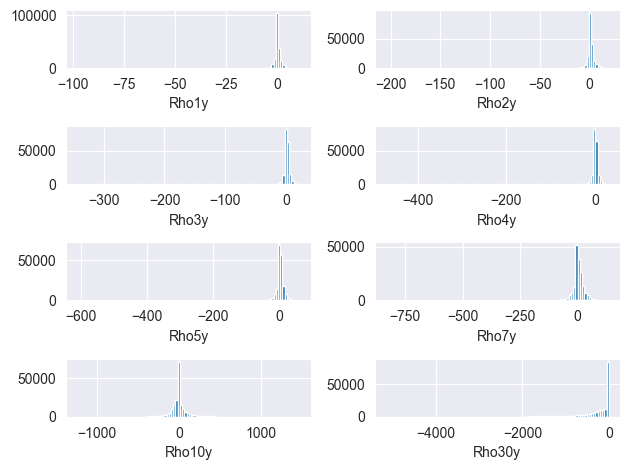

              min       25%      mean        75%         max
fmv     -69938.25   4541.54  97747.87  108140.94  1784549.09
Delta1 -435069.76 -34584.04 -22267.27   -2218.74   216124.52
Delta2 -412495.69 -21234.31 -13698.78    -493.09   300018.51
Delta3 -296034.74 -22704.23 -15022.28    -865.73   187414.30
Delta4 -312777.09 -16568.88 -11598.56    -655.58    40923.66
Delta5 -355741.29 -16517.41 -12325.23       0.00    10391.24
Rho1y      -97.76     -0.01      0.21       0.67       11.44
Rho2y     -204.80     -0.00      0.88       2.29       19.63
Rho3y     -343.17     -0.03      0.45       2.70       23.23
Rho4y     -472.70     -0.06      0.02       3.42       31.82
Rho5y     -610.45     -0.38     -0.51       6.56       63.00
Rho7y     -834.00     -4.63     -2.87      14.35      136.84
Rho10y   -1236.08    -40.65     -7.41      16.11     1472.07
Rho30y   -5158.97   -388.03   -327.03       0.00        0.00


In [2]:
# Summary statistics
print(inforce.describe())

# Cross tabulation
print(pd.crosstab(inforce['productType'], inforce['gender']))

vNames = ["gbAmt", "gmwbBalance", "withdrawal"] + [f"FundValue{i}" for i in range(1, 11)]

# Calculate age and time to maturity
inforce['age'] = (inforce['currentDate'] - inforce['birthDate']) / 365
inforce['ttm'] = (inforce['matDate'] - inforce['currentDate']) / 365

dat = inforce[vNames + ['age', 'ttm']]

# Summary statistics
print(dat.describe())

# Creating summary matrix
mSum = dat.describe().transpose().loc[:, ['min', '25%', 'mean', '75%', 'max']]
print(mSum.round(2))

# Reading Greek data and sorting it
greek = pd.read_csv(f"{path}/Greek.csv")
greek = greek.sort_values(by='recordID')

# Plot histograms
for i in range(1, 7):
    plt.subplot(3, 2, i)
    plt.hist(greek.iloc[:, i], bins=100)
    plt.xlabel(greek.columns[i])
plt.tight_layout()
plt.show()

for i in range(7, 15):
    plt.subplot(4, 2, i-6)
    plt.hist(greek.iloc[:, i], bins=100)
    plt.xlabel(greek.columns[i])
plt.tight_layout()
plt.show()

# Creating summary matrix for Greek data
mSum_greek = greek.iloc[:, 1:].describe().transpose().loc[:, ['min', '25%', 'mean', '75%', 'max']]
print(mSum_greek.round(2))


C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\384881143.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat[col] = dat[col] / 10000
C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\384881143.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


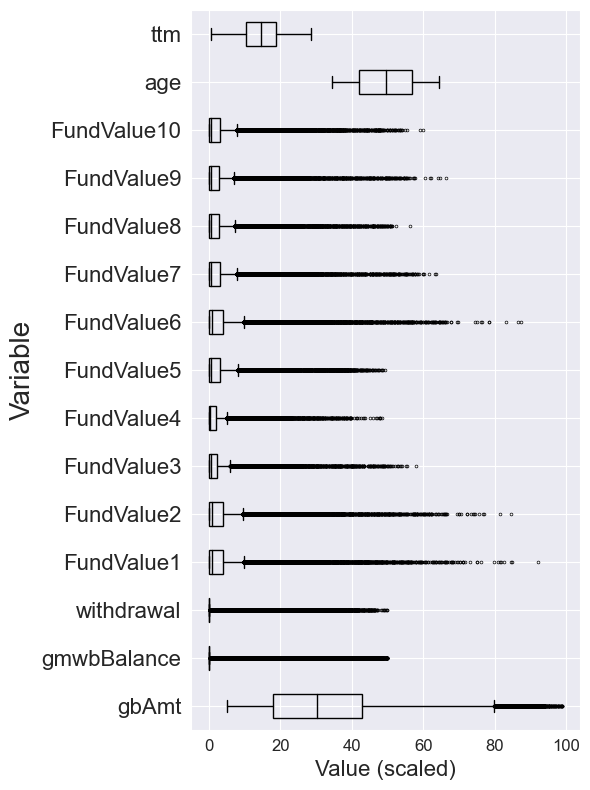

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the 'inforce' data frame
path = 'datasets'
inforce = pd.read_csv(f"{path}/inforce.csv")

# Calculate 'age' and 'ttm'
inforce['age'] = (inforce['currentDate'] - inforce['birthDate']) / 365
inforce['ttm'] = (inforce['matDate'] - inforce['currentDate']) / 365

# Select columns for 'dat' from the 'inforce' dataset
vNames = ["gbAmt", "gmwbBalance", "withdrawal"] + [f"FundValue{i}" for i in range(1, 11)]
dat = inforce[vNames + ['age', 'ttm', 'gender', 'productType']]

# Load the 'greek' dataset
greek = pd.read_csv(f"{path}/Greek.csv")

# Merge the 'inforce' and 'greek' datasets based on a common identifier, e.g., 'recordID'
merged_data = pd.merge(inforce, greek, on='recordID', how='inner')

# Filter and calculate proportion of zero values for numeric variables (excluding categorical columns)
numeric_columns = [col for col in dat.columns if col not in ['gender', 'productType']]
zero_proportions = {}
for col in numeric_columns:
    nonzero_values = dat[col][dat[col] > 0]
    zero_proportion = (dat[col] == 0).mean()
    zero_proportions[col] = zero_proportion

# Divide numeric variables by 10,000 (except 'ttm' and 'age')
for col in numeric_columns:
    if col not in ['ttm', 'age']:
        dat[col] = dat[col] / 10000

# Summary statistics for numeric variables in 'dat'
dat_numeric_summary = dat[numeric_columns].describe()


# ... (previous code)

fig, ax = plt.subplots(figsize=(6, 8))  # Adjust the figure size
#ax.set_facecolor('none')  # Set background color to none
#ax.grid(False)  # Disable the grid

boxplot_data = [dat[col].values for col in numeric_columns]
boxplot = ax.boxplot(boxplot_data, vert=False, patch_artist=True, labels=numeric_columns,
                     flierprops={'marker': 'o', 'markerfacecolor': 'none', 'markersize': 2, 'markeredgewidth': 0.5},
                     medianprops={'color': 'black', 'linewidth': 1.0},
                     boxprops={'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 1.0},  # Added edgecolor to boxprops
                     whiskerprops={'color': 'black', 'linewidth': 1.0},
                     capprops={'color': 'black', 'linewidth': 1.0})

# Style adjustments
ax.set_xlabel('Value (scaled)', fontsize=16)  # Retained the font size
ax.set_ylabel('Variable', fontsize=20)  # Increased the font size
ax.tick_params(axis='x', labelsize=12)  # Set x-tick label size
ax.tick_params(axis='y', labelsize=16)  # Set y-tick label size (variable names)

fig.tight_layout()
fig.savefig('va_x_boxplot.png', dpi=300)
fig.show()



In [4]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# 
# # ... (same as your previous code for data loading and processing)
# 
# # Adjust the vertical size of the figure
# fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 7.5), sharex=True)
# 
# for i, col in enumerate(numeric_columns):
#     sns.violinplot(x=dat[col], ax=axes[i], inner='quartile', bw=0.2)
#     axes[i].set_ylabel(col, rotation=0, labelpad=80, verticalalignment='center', fontsize=10)
#     axes[i].yaxis.tick_right()
#     
#     # Remove the x-axis label from individual plots, except the last one
#     if i < len(numeric_columns) - 1:
#         axes[i].set_xlabel('')
# 
# # Adjust layout and labels
# plt.xlabel('Value (scaled)')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
# plt.tight_layout()
# plt.savefig('va_x_violin.png', dpi=300)
# plt.show()



In [5]:

# Print summary statistics
print("Numeric Summary Statistics for 'dat':")
print(dat_numeric_summary)

# Frequency table for 'dat' categorical variables
categorical_columns = ['gender', 'productType']
dat_categorical_summary = {}
for column in categorical_columns:
    dat_categorical_summary[column] = dat[column].value_counts()

# Print frequency tables for categorical variables in LaTeX format
print("\nFrequency Tables for Categorical Variables in 'dat' (LaTeX Format):")
for column, freq_table in dat_categorical_summary.items():
    print(f"\n{column}:")
    print(freq_table.to_latex())

# Print proportion of zero values for numeric variables
print("\nProportion of Zero Values for Numeric Variables:")
for col, proportion in zero_proportions.items():
    print(f"{col}: {proportion:.4f}")


Numeric Summary Statistics for 'dat':
               gbAmt    gmwbBalance     withdrawal     FundValue1  \
count  190000.000000  190000.000000  190000.000000  190000.000000   
mean       31.350722       3.614074       2.192780       2.661138   
std        16.434388       8.582711       5.825314       4.691797   
min         5.000172       0.000000       0.000000       0.000000   
25%        17.975897       0.000000       0.000000       0.000000   
50%        30.352462       0.000000       0.000000       0.829921   
75%        42.754413       0.000000       0.000000       3.920890   
max        98.920453      49.970873      49.958573      92.154870   

          FundValue2     FundValue3     FundValue4     FundValue5  \
count  190000.000000  190000.000000  190000.000000  190000.000000   
mean        2.604448       1.739142       1.450735       2.104104   
std         4.539910       3.206379       2.609431       3.584431   
min         0.000000       0.000000       0.000000       0.00000

In [6]:
dat = inforce[vNames + ['age', 'ttm', 'gender', 'productType']]
dat

,gbAmt,gmwbBalance,withdrawal,FundValue1,FundValue2,FundValue3,FundValue4,FundValue5,FundValue6,FundValue7,FundValue8,FundValue9,FundValue10,age,ttm,gender,productType
0,87657.368596,0.0,0.0,0.000000,0.000000,0.000000,45008.862226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.361644,19.265753,F,ABRP
1,161534.095807,0.0,0.0,25681.176167,0.000000,23096.983282,16719.403927,19297.086334,25791.346577,24386.580008,0.000000,23949.686269,21906.863182,57.786301,18.180822,M,ABRP
2,407190.045231,0.0,0.0,0.000000,0.000000,0.000000,0.000000,389147.884504,0.000000,0.000000,0.000000,0.000000,0.000000,53.120548,18.180822,M,ABRP
3,307425.136759,0.0,0.0,0.000000,0.000000,52957.626980,0.000000,85110.564649,0.000000,0.000000,0.000000,62465.008957,0.000000,42.863014,14.682192,M,ABRP
4,356480.863596,0.0,0.0,0.000000,27505.372618,12784.848141,14425.316972,31306.967821,24655.367374,17119.720906,18851.816256,16424.639530,21829.421214,62.709589,11.175342,F,ABRP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189995,162604.841449,0.0,0.0,24004.225151,0.000000,12223.726324,0.000000,0.000000,24153.939808,17253.199479,20098.295727,15142.768602,0.000000,52.868493,11.427397,F,IBSU
189996,134341.963171,0.0,0.0,22970.416817,0.000000,0.000000,8326.158554,17220.422873,0.000000,17925.959885,14351.516537,0.000000,17077.970379,36.523288,11.175342,F,IBSU
189997,211147.896384,0.0,0.0,0.000000,27650.806655,15276.777833,19957.106024,28283.518625,0.000000,0.000000,25026.211422,18474.214139,0.000000,62.293151,15.843836,F,IBSU
189998,316291.418855,0.0,0.0,0.000000,264862.996212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.353425,5.169863,M,IBSU


In [7]:


# Additional Checks
# Assuming inforce and greek are your dataframes
print("Column names and types in 'inforce':")
print(inforce.dtypes)
print("Column names and types in 'greek':")
print(greek.dtypes)



Column names and types in 'inforce':
recordID              int64
survivorShip        float64
gender               object
productType          object
issueDate             int64
matDate               int64
birthDate             int64
currentDate           int64
baseFee             float64
riderFee            float64
rollUpRate          float64
gbAmt               float64
gmwbBalance         float64
wbWithdrawalRate    float64
withdrawal          float64
FundValue1          float64
FundValue2          float64
FundValue3          float64
FundValue4          float64
FundValue5          float64
FundValue6          float64
FundValue7          float64
FundValue8          float64
FundValue9          float64
FundValue10         float64
FundNum1              int64
FundNum2              int64
FundNum3              int64
FundNum4              int64
FundNum5              int64
FundNum6              int64
FundNum7              int64
FundNum8              int64
FundNum9              int64
FundNum10  

In [8]:
# Assuming date columns are in datetime format
inforce['calculated_age'] = (inforce['currentDate'] - inforce['birthDate'])/ 365
inforce['calculated_ttm'] = (inforce['matDate'] - inforce['currentDate'])/ 365

print("Age calculation matches:", inforce['calculated_age'].equals(inforce['age']))
print("TTM calculation matches:", inforce['calculated_ttm'].equals(inforce['ttm']))




Age calculation matches: True
TTM calculation matches: True


In [9]:
# Assuming recordID is a column in the greek dataframe
print("Greek data is sorted by recordID:", greek['recordID'].is_monotonic_increasing)


Greek data is sorted by recordID: False


In [10]:
# import pandas as pd
# 
# # Specify the paths to your files
# file_paths = [f"{path}/inforce.csv", f"{path}/Greek.csv", f"{path}/lhs.csv", f"{path}/clhs.csv", f"{path}/hkmeans.csv"]
# 
# dataframes = [pd.read_csv(file_path, usecols=['recordID']) for file_path in file_paths]
# 
# # Check if 'recordID' columns are the same across all dataframes
# is_same_recordID = all(dataframes[0]['recordID'].equals(df['recordID']) for df in dataframes[1:])
# 
# print(f"All CSV files have the same 'recordID' column in the same order: {is_same_recordID}")

In [11]:
inforce = pd.read_csv(f"{path}/inforce.csv")
greek = pd.read_csv(f"{path}/greek.csv")
lhs = pd.read_csv(f"{path}/lhs.csv", header=None)
clhs = pd.read_csv(f"{path}/clhs.csv", header=None)
hkmeans = pd.read_csv(f"{path}/hkmeans.csv", header=None)

In [12]:
print(inforce.head())

   recordID  survivorShip gender productType  issueDate  matDate  birthDate  \
0         1           1.0      F        ABRP      38596    48823      24504   
1         2           1.0      M        ABRP      41122    48427      20699   
2         3           1.0      M        ABRP      41122    48427      22402   
3         4           1.0      M        ABRP      38384    47150      26146   
4         5           1.0      F        ABRP      36739    45870      18902   

   currentDate  baseFee  riderFee  ...  FundFee1  FundFee2  FundFee3  \
0        41791     0.02     0.005  ...     0.003     0.005     0.006   
1        41791     0.02     0.005  ...     0.003     0.005     0.006   
2        41791     0.02     0.005  ...     0.003     0.005     0.006   
3        41791     0.02     0.005  ...     0.003     0.005     0.006   
4        41791     0.02     0.005  ...     0.003     0.005     0.006   

   FundFee4  FundFee5  FundFee6  FundFee7  FundFee8  FundFee9  FundFee10  
0     0.008     0

In [13]:
print(greek.head())

   recordID            fmv       Delta1       Delta2       Delta3  \
0     10997  702918.993899 -31145.57760 -78707.00720 -24825.56110   
1     75594   -7091.972750  -5907.43925  -4285.92875  -4013.31085   
2     90638   23479.506397      0.00000      0.00000      0.00000   
3     10998  592452.652911 -96497.05770 -42606.77860      0.00000   
4     75595   -3169.236876  -2157.54160   -972.14895  -1538.32305   

        Delta4      Delta5     Rho1y     Rho2y     Rho3y     Rho4y  \
0 -27877.87420     0.00000  0.857805  5.772105  5.826825  6.799747   
1  -2250.54045 -2704.68025 -0.032713 -0.020956 -0.084087 -0.142369   
2 -52965.30100     0.00000  0.237856  0.830658  0.996160  1.243971   
3 -32586.88975     0.00000  1.702684  6.966878  7.955922  9.756816   
4   -192.83305  -192.83305 -0.032131 -0.061238 -0.105306 -0.154660   

        Rho5y       Rho7y      Rho10y      Rho30y  
0 -181.376131 -378.647017    0.000000    0.000000  
1   -0.307141   -0.901327   -6.136490   -3.997168  
2    2.4

In [14]:
print(lhs.head())

   0     1
0  1  1036
1  2  1978
2  3  2208
3  4  2464
4  5  2884


In [15]:
print(clhs.head())

   0     1
0  1   383
1  2   728
2  3  1276
3  4  1871
4  5  1901


In [16]:
print(hkmeans.head())


   0     1
0  1   302
1  2   958
2  3  1530
3  4  1786
4  5  1871


In [17]:
test = pd.read_csv(f"{path}/clhs.csv", header = None, usecols=[1])
print(test)
test.iloc[:,0].values

          1
0       383
1       728
2      1276
3      1871
4      1901
..      ...
335  185196
336  185366
337  185409
338  187033
339  189226

[340 rows x 1 columns]


array([   383,    728,   1276,   1871,   1901,   2484,   4082,   4578,
         5272,   5855,   7684,   8802,   9174,   9569,   9612,   9899,
        11959,  12230,  12984,  13436,  13790,  13909,  14291,  14412,
        14633,  14634,  14872,  15246,  15766,  17262,  17263,  17995,
        18767,  18813,  19006,  20174,  20646,  20947,  21251,  22230,
        22557,  22821,  23346,  24368,  24514,  24756,  24931,  25086,
        25477,  25538,  28144,  28463,  29212,  29688,  29944,  30479,
        31400,  31863,  31885,  32123,  32933,  33113,  33249,  33453,
        33520,  33665,  34386,  36305,  36423,  36467,  38379,  40025,
        40199,  40380,  40488,  41836,  41985,  42947,  43485,  44022,
        45092,  45474,  45522,  45621,  47005,  47106,  48167,  48505,
        48792,  49015,  49365,  49399,  49710,  50125,  50774,  51047,
        51322,  52576,  52730,  53350,  53760,  54065,  54290,  55030,
        57100,  58151,  58510,  59327,  59643,  59714,  59851,  60175,
      

In [18]:

import pandas as pd
import numpy as np
import torch
from easygpr import GPRModel
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt
from easygpr.utils.data_handling import MinMaxScaler
from easygpr.utils.data_handling import to_numpy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Adjust the paths as necessary

# Reading inforce data, computing additional columns, and sorting by recordID
inforce = pd.read_csv(f"{path}/inforce.csv")
inforce = inforce.sort_values(by='recordID').reset_index(drop=True)

vNames = ["gbAmt", "gmwbBalance", "withdrawal"] + [f"FundValue{i}" for i in range(1, 11)]

# Calculate age and time to maturity
inforce['age'] = (inforce['currentDate'] - inforce['birthDate']) / 365
inforce['ttm'] = (inforce['matDate'] - inforce['currentDate']) / 365

# Define function to calculate percentage error
def calc_pe(y_true, y_pred):
    return np.sum(y_pred - y_true) / np.sum(y_true)

datN = inforce[vNames + ['age', 'ttm']]
datC = inforce[["gender", "productType"]]
dat = pd.concat([datN, datC], axis=1)

# Reading and sorting greek data
greek = pd.read_csv(f"{path}/Greek.csv")
greek = greek.sort_values(by='recordID').reset_index(drop=True)

# Normalize data and one-hot encode categorical variables
X = dat.drop(columns=['gender', 'productType'])
X = pd.get_dummies(dat, drop_first=True)

# Initialize scalers
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Scale X
X_scaled = X_scaler.fit(X)


In [19]:
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Assuming greek, X_scaled, y_scaler, path, calc_pe, GPRModel, LinearRegression, KNeighborsRegressor are defined elsewhere in your script

# Read sampling strategy
S = pd.read_csv(f"{path}/lhs.csv", sep=",", header=None)
S = S.iloc[:, 1].values

# Select samples and target values
Z = X_scaled[S, :]
# Define target values
y = greek.loc[S, 'fmv'] / 1000
y_scaled = y_scaler.fit(y.values.reshape(-1, 1)).reshape(-1)

hyper_dfs = []
results = []

residuals_dict = {}

# Initialize models
models = {
'Linear Regression': LinearRegression(),
'KNN': KNeighborsRegressor(),
'm1': GPRModel(train_x=torch.tensor(Z), train_y=torch.tensor(y_scaled), kernel="RBF", mean="constant"),
'm2': GPRModel(train_x=torch.tensor(Z), train_y=torch.tensor(y_scaled), kernel="Mat52", mean="constant"),
'm3': GPRModel(train_x=torch.tensor(Z), train_y=torch.tensor(y_scaled), kernel="Exp", mean="constant"),        
'm4': GPRModel(train_x=torch.tensor(Z), train_y=torch.tensor(y_scaled), kernel="RBF", mean="linear"),              
'm5': GPRModel(train_x=torch.tensor(Z), train_y=torch.tensor(y_scaled), kernel="Mat52", mean="linear"),
'm6': GPRModel(train_x=torch.tensor(Z), train_y=torch.tensor(y_scaled), kernel="Exp", mean="linear"),
}

# Fit models and make predictions
for model_name, model in models.items():
    if model_name in ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']:
        model.fit_model(training_iterations=1000)
        hyper_dfs.append(model.print_hyperparameters())
    
        # Make predictions for the entire dataset and unscale predictions
        yhat_scaled = model.make_predictions(torch.tensor(X_scaled, dtype=torch.float32), type="f").mean
        yhat = to_numpy(y_scaler.unscale(yhat_scaled.reshape(-1, 1)).reshape(-1))  # Unscaled predictions
    else:
        model.fit(to_numpy(Z), y)
        yhat = model.predict(to_numpy(X_scaled))
    
    # Calculate performance metrics
    r2 = r2_score(greek['fmv'].values / 1000, yhat)
    pe = calc_pe(greek['fmv'].values / 1000, yhat)
    rmse = np.sqrt(mean_squared_error(greek['fmv'].values / 1000, yhat))
    
    # Calculate BIC
    if model_name in ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']:
        bic = model.bic
    elif model_name == 'Linear Regression':
        n = len(y)
        p = X.shape[1]
        mse = mean_squared_error(y, model.predict(to_numpy(Z)))
        bic = n * np.log(mse) + p * np.log(n)
    else:  # KNN
        bic = "NA"
    
    
    # Store the results
    results.append({
        #'Strategy': strategy.replace('.csv', ''),
        'Model': model_name,
        'R²': r2,
        'PE': pe,
        'RMSE': rmse,
        'BIC': bic
    })
    
    print(f"Model: {model_name}, R²: {r2}, PE: {pe}, RMSE: {rmse}")
    
    # Calculate residuals
    residuals = (greek['fmv'].values / 1000) - yhat
    residuals_dict[model_name] = residuals

    # Plot residuals for each model
    plt.figure(figsize=(8, 4))
    plt.scatter(greek['fmv'] / 1000, residuals, label=f'{model_name} Residuals')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.xlabel('FMV (MC)')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title(f'{model_name} Residuals')
    plt.tight_layout()
    plt.savefig(f'{model_name}_residuals.png', dpi=300)
    plt.close()

# Convert results to a pandas DataFrame
results_df = pd.DataFrame(results)


C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\580828757.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'm1': GPRModel(train_x=torch.tensor(Z), train_y=torch.tensor(y_scaled), kernel="RBF", mean="constant"),
C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\580828757.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'm2': GPRModel(train_x=torch.tensor(Z), train_y=torch.tensor(y_scaled), kernel="Mat52", mean="constant"),
C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\580828757.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor

Model: Linear Regression, R²: 0.8160719145716895, PE: 0.010203742975990837, RMSE: 72.8960660117208


C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Model: KNN, R²: 0.6915052191334843, PE: -0.021735718939498664, RMSE: 94.4069520960078
Fitting complete.
--- 
--- final mll: 2.2595
--- num_params: 37
--- BIC: 211.1519


C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\580828757.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yhat_scaled = model.make_predictions(torch.tensor(X_scaled, dtype=torch.float32), type="f").mean


Model: m1, R²: 0.9670536319954252, PE: -0.0119267754224237, RMSE: 30.85203666565422
Fitting complete.
--- 
--- final mll: 2.2255
--- num_params: 37
--- BIC: 211.2200


C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\580828757.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yhat_scaled = model.make_predictions(torch.tensor(X_scaled, dtype=torch.float32), type="f").mean


Model: m2, R²: 0.9743783408551183, PE: -0.005472200674419586, RMSE: 27.207190088894237
Fitting complete.
--- 
--- final mll: 1.6401
--- num_params: 37
--- BIC: 212.3908


C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\580828757.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yhat_scaled = model.make_predictions(torch.tensor(X_scaled, dtype=torch.float32), type="f").mean


Model: m3, R²: 0.9312201718072708, PE: -0.011571529351581905, RMSE: 44.57697661520349
Fitting complete.
--- 
--- final mll: 2.3656
--- num_params: 71
--- BIC: 409.1199


C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\580828757.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yhat_scaled = model.make_predictions(torch.tensor(X_scaled, dtype=torch.float32), type="f").mean


Model: m4, R²: 0.9658141577321118, PE: -0.007208996909276974, RMSE: 31.427020476459994
Fitting complete.
--- 
--- final mll: 2.3442
--- num_params: 71
--- BIC: 409.1623


C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\580828757.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yhat_scaled = model.make_predictions(torch.tensor(X_scaled, dtype=torch.float32), type="f").mean


Model: m5, R²: 0.9687165489091633, PE: -0.004109606200760578, RMSE: 30.063351509401855
Fitting complete.
--- 
--- final mll: 1.9815
--- num_params: 71
--- BIC: 409.8812


C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\580828757.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yhat_scaled = model.make_predictions(torch.tensor(X_scaled, dtype=torch.float32), type="f").mean


Model: m6, R²: 0.9605550494520158, PE: -0.014082205807688071, RMSE: 33.757927351831576


In [ ]:
# Create plots with multiple models
model_combinations = [
    ['Linear Regression', 'KNN', 'm1', 'm2', 'm3'],
    ['m1', 'm4'],
    ['m2', 'm5'],
    ['m3', 'm6'],
]

import matplotlib.pyplot as plt

# Parameters to tweak point size and transparency
point_size = 4
alpha_value = 0.1
# Set global font size
plt.rcParams['font.size'] = 14

# Create a dictionary to store distinct markers and colors for each model
model_styles = {
    'Linear Regression': {'marker': 'o', 'color': (0.1, 0.1, 0.8), 'alpha': alpha_value},
    'KNN': {'marker': 'x', 'color': (0.8, 0.1, 0.1), 'alpha': alpha_value},
    'm1': {'marker': '.', 'color': (0.7, 0.7, 0.1), 'alpha': alpha_value},
    'm2': {'marker': '+', 'color': (0.1, 0.7, 0.7), 'alpha': alpha_value},
    'm3': {'marker': 's', 'color': (0.7, 0.1, 0.7), 'alpha': alpha_value/2},
    'm4': {'marker': 'd', 'color': (0.15, 0.15, 0.15), 'alpha': alpha_value},
    'm5': {'marker': '^', 'color': (0.7, 0.7, 0.7), 'alpha': alpha_value},
    'm6': {'marker': 'v', 'color': (0.3, 0.7, 0.3), 'alpha': alpha_value},
}

# A dictionary to map the old model names to new names for labeling
model_name_mapping = {
    'm4': 'm1-Lin',
    'm5': 'm2-Lin',
    'm6': 'm3-Lin'
}

# Function to fix alpha for legend
def fix_legend_alpha(legend):
    for handles in legend.legendHandles:
        handles.set_alpha(1)

# Plot the first combination separately
plt.figure(figsize=(8, 4))
plt.gca().set_facecolor('white')  # Set background color to white
plt.gca().grid(False)  # Disable grid
plt.gca().spines[['top', 'right', 'bottom', 'left']].set_edgecolor('black')  # Set spine edge color to black

for model_name in model_combinations[0]:
    plt.scatter(greek['fmv'] / 1000, residuals_dict[model_name], label=f'{model_name_mapping.get(model_name, model_name)} Residuals',
                alpha=model_styles[model_name]['alpha'], s=point_size,
                marker=model_styles[model_name]['marker'], color=model_styles[model_name]['color'])
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('$y$ (FMV)')
plt.ylabel('Residual')
plt.legend()
fix_legend_alpha(plt.legend())
plt.title('Residual Comparison Over Models')
plt.tight_layout()
plt.savefig('_'.join(model_combinations[0]) + '_combined_residuals.png', dpi=300)
plt.show()
plt.close()


C:\Users\jrisk\AppData\Local\Temp\ipykernel_28180\779931930.py:38: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


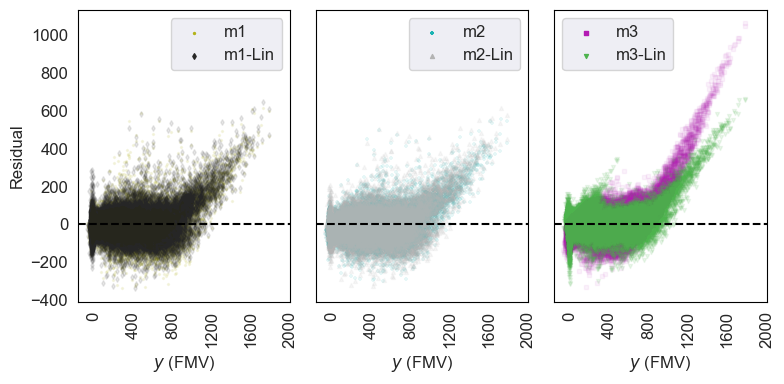

In [60]:
# Increase the global font size to counteract the shrinking effect in LaTeX
plt.rcParams['font.size'] = 12  # Reduced font size slightly to fit more labels

# Plot the remaining combinations as side-by-side subplots
fig, axes = plt.subplots(1, 3, figsize=(8, 4), gridspec_kw={'width_ratios': [1, 1, 1]}, sharey=True)

for ax in axes:
    ax.set_facecolor('white')  # Set background color to white
    ax.grid(False)  # Disable grid
    ax.spines[['top', 'right', 'bottom', 'left']].set_edgecolor('black')  # Set spine edge color to black
    ax.tick_params(labelsize=12)  # Reduced font size slightly

# Set the y-axis label only for the first subplot
axes[0].set_ylabel('Residual', fontsize=12)  # Reduced font size slightly

for i, combo in enumerate(model_combinations[1:]):
    for model_name in combo:
        axes[i].scatter(greek['fmv'] / 1000, residuals_dict[model_name], label=f'{model_name_mapping.get(model_name, model_name)}',
                        alpha=model_styles[model_name]['alpha'], s=point_size * 2, 
                        marker=model_styles[model_name]['marker'], color=model_styles[model_name]['color'])
    axes[i].axhline(y=0, color='k', linestyle='--')
    axes[i].set_xlabel('$y$ (FMV)', fontsize=12)  # Reduced font size slightly
    x_ticks = [0, 400, 800, 1200, 1600, 2000]
    axes[i].set_xticks(x_ticks)
    axes[i].set_xticklabels([x for x in x_ticks], rotation=90)  # Set 5 x-ticks and rotate them vertically
    axes[i].legend()
    fix_legend_alpha(axes[i].legend())

fig.tight_layout()
fig.savefig('comparing_mean_functions.png', dpi=300)
plt.show()


In [21]:
model.kernel_wrapper.print_hyperparameters()

,Hyperparameter Name,Feature Name,Unscaled Value,Scaled Value
0,raw_outputscale,None,0.007751,0.007751
1,base_kernel.raw_lengthscale,None,1.131784,1.320615
2,base_kernel.raw_lengthscale,None,1.812612,1.975501
3,base_kernel.raw_lengthscale,None,13.469216,16.816989
4,base_kernel.raw_lengthscale,None,5.076248,10.642734
5,base_kernel.raw_lengthscale,None,1.519746,1.830244
6,base_kernel.raw_lengthscale,None,5.476459,12.591241
7,base_kernel.raw_lengthscale,None,11.908858,14.546770
8,base_kernel.raw_lengthscale,None,6.318644,13.870571
9,base_kernel.raw_lengthscale,None,1.459006,3.030401


In [22]:
import pandas as pd

# Initialize an empty list to store data
# Initialize lists to store data for each dataframe
data_unscaled = []
data_scaled = []

# Loop through each model (assuming `models` is a list of your model instances)
for model_name in ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']:
    model = models[model_name]
    # Get the hyperparameters DataFrame for the current model
    hyper_df = model.print_hyperparameters(feature_names=X.columns)

    # Create a series for unscaled values and append it to the data_unscaled list
    hyper_series_unscaled = pd.Series(hyper_df['Unscaled Value'].values, index=hyper_df['Hyperparameter Name'] + ' ' + hyper_df['Feature Name'].fillna(''))
    data_unscaled.append(hyper_series_unscaled)

    # Create a series for scaled values and append it to the data_scaled list
    hyper_series_scaled = pd.Series(hyper_df['Scaled Value'].values, index=hyper_df['Hyperparameter Name'] + ' ' + hyper_df['Feature Name'].fillna(''))
    data_scaled.append(hyper_series_scaled)



# Create DataFrames from the lists of series
hyper_df_unscaled = pd.DataFrame(data_unscaled, index=['m1', 'm2', 'm3', 'm4', 'm5', 'm6'])
hyper_df_scaled = pd.DataFrame(data_scaled, index=['m1', 'm2', 'm3', 'm4', 'm5', 'm6'])

hyper_df_unscaled.columns = hyper_df_unscaled.columns.str.replace('base_kernel.raw_lengthscale ', '')
hyper_df_scaled.columns = hyper_df_scaled.columns.str.replace('base_kernel.raw_lengthscale ', '')
hyper_df_unscaled.columns = hyper_df_unscaled.columns.str.replace('productType_', '')
hyper_df_scaled.columns = hyper_df_scaled.columns.str.replace('productType_', '')

# Save the DataFrames
hyper_df_unscaled.to_csv('hyperparameters_unscaled.csv')
hyper_df_scaled.to_csv('hyperparameters_scaled.csv')

In [23]:

# To transpose the dataframes
hyper_df_unscaled_transposed = hyper_df_unscaled.transpose()
hyper_df_scaled_transposed = hyper_df_scaled.transpose()




In [24]:
np.round(hyper_df_unscaled,2)

,raw_outputscale,gbAmt,gmwbBalance,withdrawal,FundValue1,FundValue2,FundValue3,FundValue4,FundValue5,FundValue6,...,DBWB,IBRP,IBRU,IBSU,MBRP,MBRU,MBSU,WBRP,WBRU,WBSU
m1,0.29,0.94,2.07,0.78,1.61,1.38,2.40,1.23,3.13,0.88,...,28.31,17.31,1.36,5.00,29.24,1.80,24.42,29.41,12.94,30.25
m2,0.33,1.63,3.40,1.19,3.03,2.29,4.55,1.88,4.60,1.71,...,31.40,23.49,2.04,7.42,30.63,2.47,27.49,31.18,19.06,33.33
m3,0.02,1.08,14.89,2.21,5.42,14.35,10.21,20.11,8.88,4.40,...,30.47,33.26,0.08,7.77,31.24,0.08,34.83,32.24,25.43,32.37
m4,0.05,0.71,1.22,0.55,0.98,0.80,2.40,0.74,7.52,0.48,...,10.93,9.30,0.20,2.41,12.41,0.23,20.69,11.88,7.31,9.93
m5,0.06,1.05,1.86,0.75,1.76,1.22,3.81,1.12,7.87,0.78,...,22.07,16.37,0.15,3.65,24.68,0.17,15.79,24.98,10.99,26.68
m6,0.01,1.13,1.81,13.47,5.08,1.52,5.48,11.91,6.32,1.46,...,8.78,4.38,0.13,1.38,21.31,0.17,8.17,10.56,13.25,7.85


In [25]:
hyper_df_T = hyper_df_unscaled.transpose()

np.round(hyper_df_T,2)

,m1,m2,m3,m4,m5,m6
raw_outputscale,0.29,0.33,0.02,0.05,0.06,0.01
gbAmt,0.94,1.63,1.08,0.71,1.05,1.13
gmwbBalance,2.07,3.40,14.89,1.22,1.86,1.81
withdrawal,0.78,1.19,2.21,0.55,0.75,13.47
FundValue1,1.61,3.03,5.42,0.98,1.76,5.08
FundValue2,1.38,2.29,14.35,0.80,1.22,1.52
FundValue3,2.40,4.55,10.21,2.40,3.81,5.48
FundValue4,1.23,1.88,20.11,0.74,1.12,11.91
FundValue5,3.13,4.60,8.88,7.52,7.87,6.32
FundValue6,0.88,1.71,4.40,0.48,0.78,1.46


In [26]:
hyper_df_unscaled_transposed

,m1,m2,m3,m4,m5,m6
raw_outputscale,0.286320,0.334554,0.021088,0.049690,0.055036,0.007751
gbAmt,0.935154,1.632657,1.084793,0.705593,1.049709,1.131784
gmwbBalance,2.070450,3.403791,14.888693,1.223560,1.860460,1.812612
withdrawal,0.778449,1.189060,2.211723,0.545328,0.745830,13.469216
FundValue1,1.607414,3.029432,5.422561,0.980100,1.759213,5.076248
FundValue2,1.381960,2.291251,14.354346,0.800926,1.218295,1.519746
FundValue3,2.400561,4.550296,10.213185,2.400152,3.806781,5.476459
FundValue4,1.229980,1.882080,20.110642,0.742982,1.116639,11.908858
FundValue5,3.130006,4.596131,8.881685,7.519820,7.865630,6.318644
FundValue6,0.883956,1.707715,4.399861,0.484599,0.783545,1.459006


In [27]:
# Assuming df_unscaled is your DataFrame with the unscaled values
latex_table_content = hyper_df_unscaled.loc[
    ['m1', 'm2', 'm3'], 
    ['withdrawal', 'gbAmt', 'FundValue4', 'age', 'FundValue8', 'ttm', 'MBRU', 'IBRU', 'ABRU', 'DBRP', 'DBRU', 'gender_M', 'WBSU']
].transpose().to_latex(float_format="%.3f")

# Construct the LaTeX table environment
latex_table_content = f"""
\\begin{{table}}
    \\centering
    {latex_table_content}
    \\caption{{Hyperparameters Table}}
    \\label{{tab:hyperparameters}}
\\end{{table}}
"""

# Print the LaTeX table content
print(latex_table_content)


\begin{table}
    \centering
    \begin{tabular}{lrrr}
\toprule
 & m1 & m2 & m3 \\
\midrule
withdrawal & 0.778 & 1.189 & 2.212 \\
gbAmt & 0.935 & 1.633 & 1.085 \\
FundValue4 & 1.230 & 1.882 & 20.111 \\
age & 5.322 & 6.902 & 4.361 \\
FundValue8 & 2.988 & 4.707 & 6.708 \\
ttm & 2.470 & 4.483 & 4.918 \\
MBRU & 1.803 & 2.471 & 0.084 \\
IBRU & 1.358 & 2.044 & 0.081 \\
ABRU & 0.803 & 1.312 & 0.075 \\
DBRP & 1.643 & 0.235 & 2.449 \\
DBRU & 0.680 & 0.498 & 1.678 \\
gender_M & 23.539 & 27.237 & 28.175 \\
WBSU & 30.247 & 33.333 & 32.368 \\
\bottomrule
\end{tabular}

    \caption{Hyperparameters Table}
    \label{tab:hyperparameters}
\end{table}


In [28]:
hyper_df_T = hyper_df_scaled.transpose()

np.round(hyper_df_T,2)

,m1,m2,m3,m4,m5,m6
raw_outputscale,0.29,0.33,0.02,0.05,0.06,0.01
gbAmt,1.09,1.91,1.27,0.82,1.22,1.32
gmwbBalance,2.26,3.71,16.23,1.33,2.03,1.98
withdrawal,0.97,1.48,2.76,0.68,0.93,16.82
FundValue1,3.37,6.35,11.37,2.05,3.69,10.64
FundValue2,1.66,2.76,17.29,0.96,1.47,1.83
FundValue3,5.52,10.46,23.48,5.52,8.75,12.59
FundValue4,1.50,2.30,24.57,0.91,1.36,14.55
FundValue5,6.87,10.09,19.50,16.51,17.27,13.87
FundValue6,1.84,3.55,9.14,1.01,1.63,3.03


In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Define path (adjust as necessary)
path = 'datasets'

# Reading inforce data, computing additional columns, and sorting by recordID
inforce = pd.read_csv(f"{path}/inforce.csv")
inforce = inforce.sort_values(by='recordID').reset_index(drop=True)

vNames = ["gbAmt", "gmwbBalance", "withdrawal"] + [f"FundValue{i}" for i in range(1, 11)]

# Calculate age and time to maturity
inforce['age'] = (inforce['currentDate'] - inforce['birthDate']) / 365
inforce['ttm'] = (inforce['matDate'] - inforce['currentDate']) / 365

datN = inforce[vNames + ['age', 'ttm']]
datC = inforce[["gender", "productType"]]
dat = pd.concat([datN, datC], axis=1)

# Reading and sorting greek data
greek = pd.read_csv(f"{path}/Greek.csv")
greek = greek.sort_values(by='recordID').reset_index(drop=True)

# Merge datasets
data = pd.concat([dat, greek], axis=1)

# Numeric Variables
variables = ['withdrawal', 'gbAmt', 'FundValue4', 'age', 'FundValue8', 'ttm']


C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

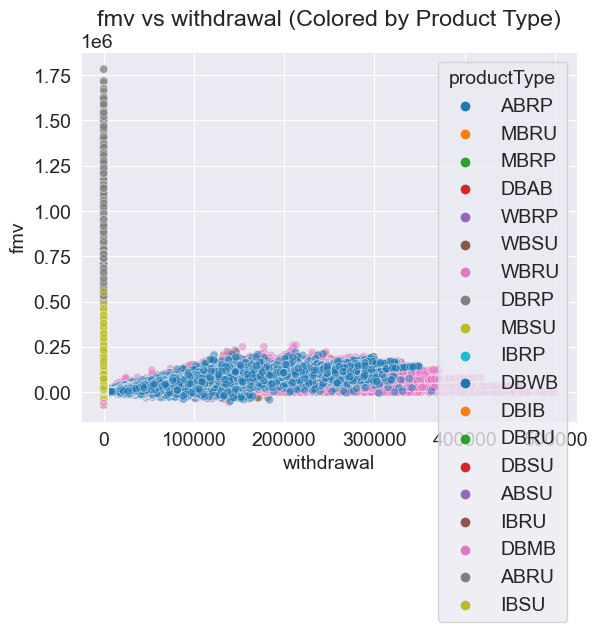

C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

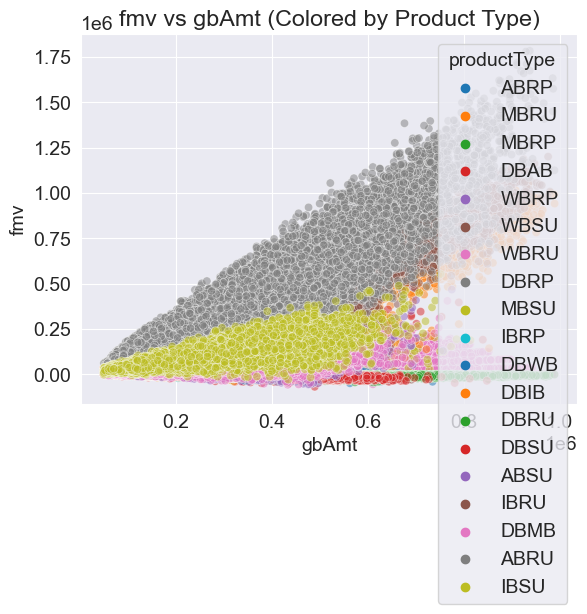

C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

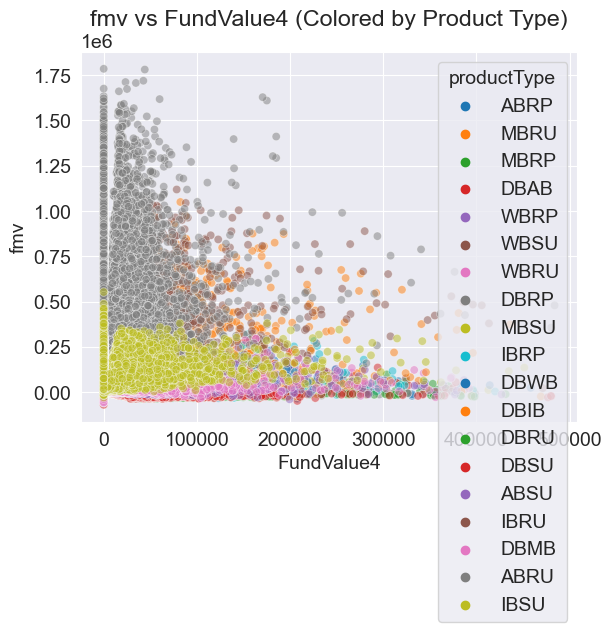

C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

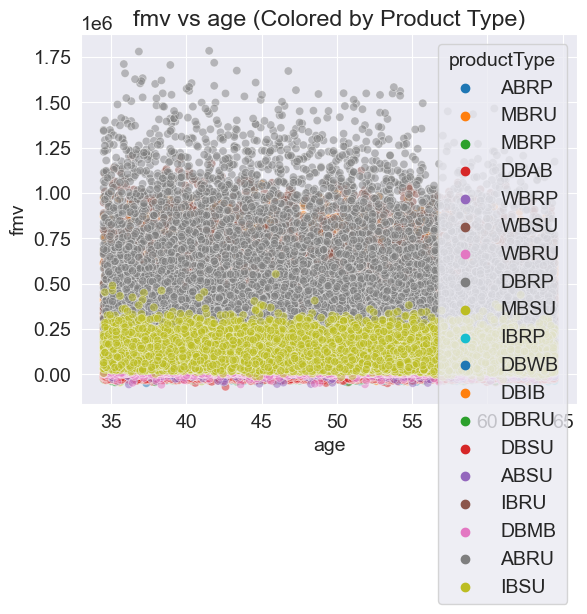

C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

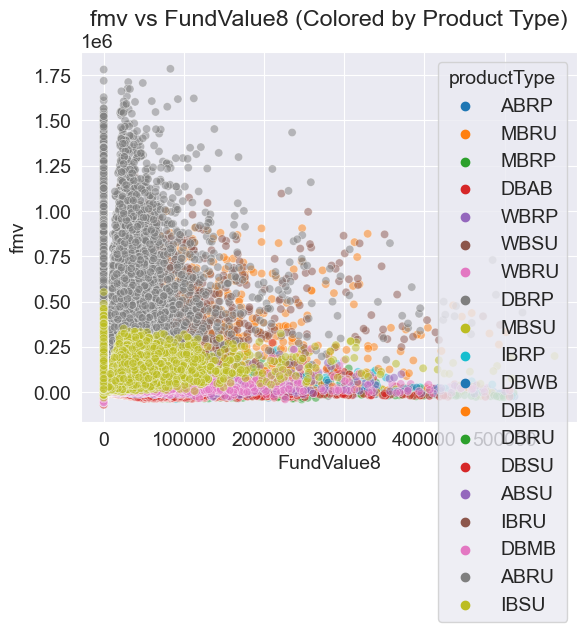

C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jrisk\anaconda3\envs\easygpr\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

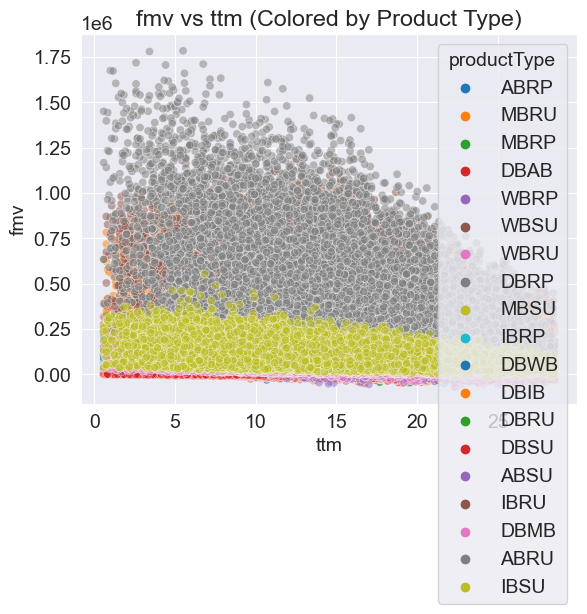

In [30]:

for var in variables:
    plt.figure()
    sns.scatterplot(x=var, y='fmv', hue='productType', data=data, palette='tab10', alpha=0.5)
    plt.title(f'fmv vs {var} (Colored by Product Type)')
    plt.show()


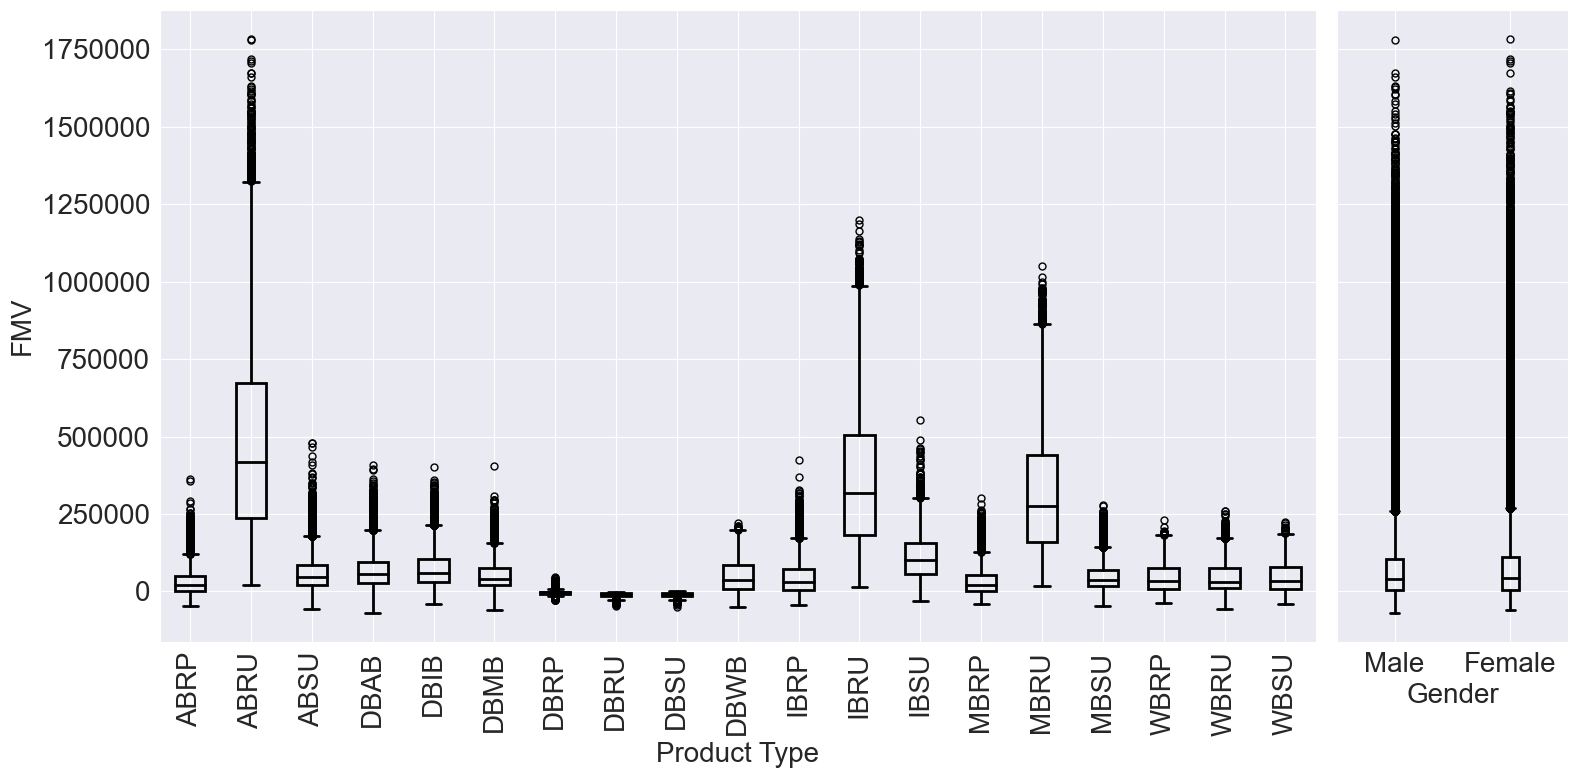

In [48]:
import pandas as pd
from matplotlib import pyplot as plt

# ... (the part where you read and merge data)

# Define path (adjust as necessary)
path = 'datasets'

# Reading inforce data, computing additional columns, and sorting by recordID
inforce = pd.read_csv(f"{path}/inforce.csv")
inforce = inforce.sort_values(by='recordID').reset_index(drop=True)

# Reading and sorting greek data
greek = pd.read_csv(f"{path}/Greek.csv")
greek = greek.sort_values(by='recordID').reset_index(drop=True)

# Merge datasets
data = pd.concat([inforce, greek], axis=1)

sorted_product_types = sorted(data['productType'].unique())
box_data_product_type = [data[data['productType'] == pt]['fmv'] for pt in sorted_product_types]

gender_labels = ['Male', 'Female']  # Assuming gender is coded as 'M' and 'F'
box_data_gender = [data[data['gender'] == g]['fmv'] for g in ['M', 'F']]

# Create subplots with specified size ratio and shared Y axis
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [5, 1]}, sharey=True)

# Boxplot of fmv over productType with increased sizes for lines and dots
axes[0].boxplot(box_data_product_type, vert=True, patch_artist=True, labels=sorted_product_types,
                flierprops={'marker': 'o', 'markerfacecolor': 'none', 'markersize': 5, 'markeredgewidth': 1},
                medianprops={'color': 'black', 'linewidth': 2.0},
                boxprops={'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 2.0},
                whiskerprops={'color': 'black', 'linewidth': 2.0},
                capprops={'color': 'black', 'linewidth': 2.0})
axes[0].set_ylabel('FMV', fontsize=20)
axes[0].set_xlabel('Product Type', fontsize=20)

# Boxplot of fmv over gender with increased sizes for lines and dots
axes[1].boxplot(box_data_gender, vert=True, patch_artist=True, labels=gender_labels,
                flierprops={'marker': 'o', 'markerfacecolor': 'none', 'markersize': 5, 'markeredgewidth': 1},
                medianprops={'color': 'black', 'linewidth': 2.0},
                boxprops={'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 2.0},
                whiskerprops={'color': 'black', 'linewidth': 2.0},
                capprops={'color': 'black', 'linewidth': 2.0})
axes[1].set_xlabel('Gender', fontsize=20)

# Rotate labels for better visibility and adjust tick label size with increased font size
axes[0].tick_params(axis='x', labelrotation=90, labelsize=20)
axes[1].tick_params(axis='x', labelrotation=0, labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)

# Adjust the FMV axis label format
axes[0].ticklabel_format(style='plain', axis='y')
axes[1].ticklabel_format(style='plain', axis='y')

fig.tight_layout()
fig.savefig('fmv_boxplots.png', dpi=300)
plt.show()


In [32]:
X.columns

Index(['gbAmt', 'gmwbBalance', 'withdrawal', 'FundValue1', 'FundValue2',
       'FundValue3', 'FundValue4', 'FundValue5', 'FundValue6', 'FundValue7',
       'FundValue8', 'FundValue9', 'FundValue10', 'age', 'ttm', 'gender_M',
       'productType_ABRU', 'productType_ABSU', 'productType_DBAB',
       'productType_DBIB', 'productType_DBMB', 'productType_DBRP',
       'productType_DBRU', 'productType_DBSU', 'productType_DBWB',
       'productType_IBRP', 'productType_IBRU', 'productType_IBSU',
       'productType_MBRP', 'productType_MBRU', 'productType_MBSU',
       'productType_WBRP', 'productType_WBRU', 'productType_WBSU'],
      dtype='object')

In [33]:
results_df = pd.DataFrame(results)
print(results_df.to_latex())



\begin{tabular}{llrrrl}
\toprule
 & Model & R² & PE & RMSE & BIC \\
\midrule
0 & Linear Regression & 0.816072 & 0.010204 & 72.896066 & 2972.233147 \\
1 & KNN & 0.691505 & -0.021736 & 94.406952 & NA \\
2 & m1 & 0.967054 & -0.011927 & 30.852037 & tensor(211.1519) \\
3 & m2 & 0.974378 & -0.005472 & 27.207190 & tensor(211.2200) \\
4 & m3 & 0.931220 & -0.011572 & 44.576977 & tensor(212.3908) \\
5 & m4 & 0.965814 & -0.007209 & 31.427020 & tensor(409.1199) \\
6 & m5 & 0.968717 & -0.004110 & 30.063352 & tensor(409.1623) \\
7 & m6 & 0.960555 & -0.014082 & 33.757927 & tensor(409.8812) \\
\bottomrule
\end{tabular}


In [34]:
models['m3'].num_param

37

In [35]:

# List to store the different sampling strategies and output file names
sampling_strategies = ["lhs.csv"]#, "clhs.csv", "hkmeans.csv"]
png_files = ["gaulhs.png"]#, "gauclhs.png", "gauhkmeans.png"]

hyper_dfs = []

results = []

for strategy, png_file in zip(sampling_strategies, png_files):
    # Read sampling strategy
    S = pd.read_csv(f"{path}/{strategy}", sep=",", header = None)
    S = S.iloc[:, 1].values

    # Select samples and target values
    Z = X_scaled[S, :]
# Define target values
    y = greek.loc[S, 'fmv'] / 1000
    y_scaled = y_scaler.fit(y.values.reshape(-1, 1)).reshape(-1)

In [36]:
from easygpr.utils.data_handling import to_torch
X_ = np.array(X)
Z = X_[S, :]


import pandas as pd

# Combine Z and y into one DataFrame
combined_df = pd.DataFrame(Z, columns=X.columns)
y = greek.loc[S, 'fmv']
combined_df['fmv'] = np.array(y)

# Remove the prefix "productType_" from column names, if present
combined_df.columns = combined_df.columns.str.replace('productType_', '')

# Find the first index where DBRP = 1
index_dbrp_1 = combined_df.index[combined_df['DBRP'] == 1].min()


# Find the first index where IBRP = 1
index_ibrp_1 = combined_df.index[combined_df['IBRP'] == 1].min()

# Find the first index where WBSU = 1
index_wbsu_1 = combined_df.index[combined_df['WBSU'] == 1].min()



# Find an index where DBRP = 0, IBRP = 0, WBSU = 0, and gmwbBalance != 0

index_custom = combined_df.index[(combined_df['DBRP'] == 0) & (combined_df['IBRP'] == 0) & (combined_df['WBSU'] == 0) & (combined_df['gmwbBalance'] != 0)].min()


# Find the first index where DBRP = 1
index_dbrp_2 = combined_df.index[combined_df['DBRP'] == 1].max()


# Find the first index where IBRP = 1
index_ibrp_2 = combined_df.index[combined_df['IBRP'] == 1].max()

# Find the first index where WBSU = 1
index_wbsu_2 = combined_df.index[combined_df['WBSU'] == 1].max()

# Find an index where DBRP = 0, IBRP = 0, WBSU = 0, and gmwbBalance != 0

index_custom2 = combined_df.index[(combined_df['DBRP'] == 0) & (combined_df['IBRP'] == 0) & (combined_df['WBSU'] == 0) & (combined_df['gmwbBalance'] != 0)].max()


# Specify the rows to display based on the selected indices
rows_to_display = [index_custom, index_dbrp_1, index_ibrp_1, index_wbsu_1, index_custom2, index_dbrp_2, index_ibrp_2, index_wbsu_2]

# Specify the columns to display
columns_to_display = ['fmv', 'ttm', 'age', 'FundValue1', 'FundValue2', 'gbAmt', 'DBRP', 'IBRP', 'WBSU']

combined_df.fmv = combined_df.fmv / 10000
combined_df.gmwbBalance = combined_df.gmwbBalance / 10000
combined_df.withdrawal = combined_df.withdrawal / 10000
combined_df.FundValue1 = combined_df.FundValue1 / 10000
combined_df.FundValue2 = combined_df.FundValue2 / 10000
combined_df.gbAmt = combined_df.gbAmt / 10000

# Display the selected rows in LaTeX format
latex_table = combined_df.loc[rows_to_display, columns_to_display].to_latex(index=False, escape=False)

# Print or save the LaTeX table
print(latex_table)



\begin{tabular}{rllllllll}
\toprule
fmv & ttm & age & FundValue1 & FundValue2 & gbAmt & DBRP & IBRP & WBSU \\
\midrule
3.100955 & 13.843836 & 52.449315 & 0.454042 & 0.389067 & 11.421625 & False & False & False \\
-0.092187 & 8.753425 & 41.194521 & 4.828621 & 0.000000 & 5.152138 & True & False & False \\
1.607285 & 6.838356 & 54.287671 & 0.000000 & 0.000000 & 12.159053 & False & True & False \\
4.802095 & 8.087671 & 42.610959 & 0.902099 & 0.877965 & 23.548378 & False & False & True \\
9.749732 & 18.761644 & 52.868493 & 1.325345 & 1.238859 & 39.301912 & False & False & False \\
-0.207351 & 9.087671 & 44.197260 & 0.000000 & 0.000000 & 43.515744 & True & False & False \\
-2.124040 & 24.098630 & 52.120548 & 0.000000 & 9.909300 & 45.187689 & False & True & False \\
6.007188 & 10.342466 & 51.868493 & 1.183428 & 1.091021 & 26.634326 & False & False & True \\
\bottomrule
\end{tabular}


In [37]:
combined_df

,gbAmt,gmwbBalance,withdrawal,FundValue1,FundValue2,FundValue3,FundValue4,FundValue5,FundValue6,FundValue7,...,IBRP,IBRU,IBSU,MBRP,MBRU,MBSU,WBRP,WBRU,WBSU,fmv
0,47.702359,0.0,0.0,0.0,0.0,252594.059221,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,-1.882733
1,14.600648,0.0,0.0,0.0,0.0,0.0,78869.162102,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,3.564371
2,9.714379,0.0,0.0,11.776078,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0.292755
3,24.458581,0.0,0.0,0.0,4.180068,25279.684907,23474.564377,0.0,44207.289526,0.0,...,False,False,False,False,False,False,False,False,False,2.974976
4,6.554457,0.0,0.0,1.460369,0.0,8952.35222,0.0,0.0,15088.193807,11547.110982,...,False,False,False,False,False,False,False,False,False,0.894426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,44.478068,0.0,0.0,3.889002,4.321902,24629.719191,17740.926371,37411.491103,41071.707497,31298.474712,...,False,False,True,False,False,False,False,False,False,21.097904
336,54.70753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,32.537381
337,48.718046,0.0,0.0,6.45994,6.258776,52035.809551,40592.357477,47734.268157,63851.780501,58103.162329,...,False,False,True,False,False,False,False,False,False,13.963390
338,18.646855,0.0,0.0,0.0,0.0,62217.159338,0.0,0.0,64703.861965,0.0,...,False,False,True,False,False,False,False,False,False,2.390914


In [38]:
combined_df.columns

Index(['gbAmt', 'gmwbBalance', 'withdrawal', 'FundValue1', 'FundValue2',
       'FundValue3', 'FundValue4', 'FundValue5', 'FundValue6', 'FundValue7',
       'FundValue8', 'FundValue9', 'FundValue10', 'age', 'ttm', 'gender_M',
       'ABRU', 'ABSU', 'DBAB', 'DBIB', 'DBMB', 'DBRP', 'DBRU', 'DBSU', 'DBWB',
       'IBRP', 'IBRU', 'IBSU', 'MBRP', 'MBRU', 'MBSU', 'WBRP', 'WBRU', 'WBSU',
       'fmv'],
      dtype='object')

In [39]:
# Specify the columns to display
columns_to_display = ['fmv', 'gbAmt', 'gmwbBalance', 'withdrawal', 'FundValue1', 'FundValue2', 'age', 'ttm', 'MBSU', 'WBRP', 'WBRU', 'WBSU']

# Display 5 rows in LaTeX format
latex_table = combined_df[columns_to_display].head(5).to_latex(index=False, escape=False)

# Print or save the LaTeX table
print(latex_table)



\begin{tabular}{rlllllllllll}
\toprule
fmv & gbAmt & gmwbBalance & withdrawal & FundValue1 & FundValue2 & age & ttm & MBSU & WBRP & WBRU & WBSU \\
\midrule
-1.882733 & 47.702359 & 0.000000 & 0.000000 & 0.000000 & 0.000000 & 58.454795 & 26.605479 & False & False & False & False \\
3.564371 & 14.600648 & 0.000000 & 0.000000 & 0.000000 & 0.000000 & 56.367123 & 12.841096 & False & False & False & False \\
0.292755 & 9.714379 & 0.000000 & 0.000000 & 11.776078 & 0.000000 & 47.531507 & 17.597260 & False & False & False & False \\
2.974976 & 24.458581 & 0.000000 & 0.000000 & 0.000000 & 4.180068 & 57.956164 & 17.682192 & False & False & False & False \\
0.894426 & 6.554457 & 0.000000 & 0.000000 & 1.460369 & 0.000000 & 51.364384 & 8.506849 & False & False & False & False \\
\bottomrule
\end{tabular}


In [40]:

# Save the DataFrame to a LaTeX file
print(results_df.to_latex())


# You can also save it as a CSV file for further use
results_df.to_csv('results.csv', index=False)

\begin{tabular}{llrrrl}
\toprule
 & Model & R² & PE & RMSE & BIC \\
\midrule
0 & Linear Regression & 0.816072 & 0.010204 & 72.896066 & 2972.233147 \\
1 & KNN & 0.691505 & -0.021736 & 94.406952 & NA \\
2 & m1 & 0.967054 & -0.011927 & 30.852037 & tensor(211.1519) \\
3 & m2 & 0.974378 & -0.005472 & 27.207190 & tensor(211.2200) \\
4 & m3 & 0.931220 & -0.011572 & 44.576977 & tensor(212.3908) \\
5 & m4 & 0.965814 & -0.007209 & 31.427020 & tensor(409.1199) \\
6 & m5 & 0.968717 & -0.004110 & 30.063352 & tensor(409.1623) \\
7 & m6 & 0.960555 & -0.014082 & 33.757927 & tensor(409.8812) \\
\bottomrule
\end{tabular}


In [41]:
Z.shape

(340, 34)

In [42]:
inforce.shape

(190000, 45)

In [43]:
pd.get_dummies(dat, drop_first=True).head()

,gbAmt,gmwbBalance,withdrawal,FundValue1,FundValue2,FundValue3,FundValue4,FundValue5,FundValue6,FundValue7,...,productType_DBWB,productType_IBRP,productType_IBRU,productType_IBSU,productType_MBRP,productType_MBRU,productType_MBSU,productType_WBRP,productType_WBRU,productType_WBSU
0,87657.368596,0.0,0.0,0.000000,0.000000,0.000000,45008.862226,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,161534.095807,0.0,0.0,25681.176167,0.000000,23096.983282,16719.403927,19297.086334,25791.346577,24386.580008,...,False,False,False,False,False,False,False,False,False,False
2,407190.045231,0.0,0.0,0.000000,0.000000,0.000000,0.000000,389147.884504,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,307425.136759,0.0,0.0,0.000000,0.000000,52957.626980,0.000000,85110.564649,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,356480.863596,0.0,0.0,0.000000,27505.372618,12784.848141,14425.316972,31306.967821,24655.367374,17119.720906,...,False,False,False,False,False,False,False,False,False,False


In [44]:
greek.shape

(190000, 15)

In [45]:
greek.head()

,recordID,fmv,Delta1,Delta2,Delta3,Delta4,Delta5,Rho1y,Rho2y,Rho3y,Rho4y,Rho5y,Rho7y,Rho10y,Rho30y
0,1,16763.294834,0.00000,0.0000,0.00000,-25157.10380,0.00000,0.115782,0.426629,0.502972,0.624366,1.221867,2.973969,-7.827654,-91.652951
1,2,-4803.217415,-10234.17215,-3871.8202,-9633.46110,-5462.96905,-7140.34545,0.090633,0.328133,0.389287,0.483673,0.945902,2.300372,-2.119515,-77.722457
2,3,-36038.487254,0.00000,0.0000,0.00000,0.00000,-36373.44875,0.000363,0.002868,0.002934,0.003366,0.006959,0.017858,-0.133003,-0.640444
3,4,45419.126711,0.00000,-9076.7755,-45574.33705,0.00000,-59685.11220,0.396119,1.536748,1.783118,2.200858,4.318199,10.536109,-78.622551,-236.591575
4,5,97013.359907,-23663.13490,-28674.7832,-23269.72335,-18732.54975,-26412.98520,0.455969,1.927647,2.180460,2.664843,5.256683,12.873388,-197.483628,-114.526438


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 'inforce' and 'dat' data frames
path = 'datasets'
inforce = pd.read_csv(f"{path}/inforce.csv")
dat = pd.concat([inforce[vNames + ['age', 'ttm']], inforce[['gender', 'productType']]], axis=1)

# Summary statistics for 'inforce'
inforce_summary = inforce.describe()

# Frequency table for 'dat' categorical variables
categorical_columns = ['gender', 'productType']
dat_categorical_summary = {}
for column in categorical_columns:
    dat_categorical_summary[column] = dat[column].value_counts()

# Numeric summary statistics for 'dat' columns
dat_numeric_summary = dat.describe()

# Plots (only if necessary due to limited space)
# Example: Histogram for 'age' and 'ttm'
plt.hist(dat['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

plt.hist(dat['ttm'], bins=20)
plt.xlabel('Time to Maturity (ttm)')
plt.ylabel('Frequency')
plt.title('Histogram of Time to Maturity')
plt.show()

# Print summary statistics
print("Summary Statistics for 'inforce':")
print(inforce_summary)

print("\nFrequency Tables for Categorical Variables in 'dat':")
for column, freq_table in dat_categorical_summary.items():
    print(f"\n{column}:\n{freq_table}")

print("\nNumeric Summary Statistics for 'dat':")
print(dat_numeric_summary)


KeyError: "['age', 'ttm'] not in index"

In [ ]:
# from scipy.stats import spearmanr
# import pandas as pd
# from easygpr.utils.data_handling import to_numpy
# 
# def compute_spearman_correlations_dataframe(df, y_vector):
#     #y_vector = to_numpy(y_vector)
#     correlations = {}
#     for col in df.columns:
#         corr, _ = spearmanr(df[col], y_vector)
#         correlations[col] = corr
#     return correlations
# 
# def compute_spearman_correlations_tensor(tensor, y_vector):
#     correlations = {}
#     #for i in range(tensor.size(1)):
#     for i in range(5):
#         print(i)
#         corr, _ = spearmanr(to_numpy(tensor[:, i]), y_vector)
#         print(corr, _)
#         correlations[f'x{i+1}'] = corr
#     return correlations


In [ ]:
#compute_spearman_correlations_dataframe(X,greek['fmv'].values)
#compute_spearman_correlations_tensor(Z, y)